In [10]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

In [2]:
(train_feature, train_label),(test_feature, test_label) = mnist.load_data()

In [3]:
train_feature_v = train_feature.reshape(len(train_feature), 784).astype('float32') #6000*[row28*col28] to 6000*784
test_feature_v = test_feature.reshape(len(test_feature), 784).astype('float32')

In [5]:
train_feature_normalize = train_feature_v/225 #Normalize the features
test_feature_normalize = test_feature_v/225
#print(train_label[0:5])

In [8]:
train_label_onehot = np_utils.to_categorical(train_label) #One-Hot encoding
test_label_onehot = np_utils.to_categorical(test_label)
#print(train_label_onehot[0:5])

In [12]:
model = Sequential()
model.add(Dense(units=256, input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
train_start = model.fit(x=train_feature_normalize, y=train_label_onehot, validation_split=0.2, epochs=10, batch_size=100,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.1443 - accuracy: 0.9578 - val_loss: 0.1319 - val_accuracy: 0.9622
Epoch 2/10
 - 6s - loss: 0.0965 - accuracy: 0.9725 - val_loss: 0.1067 - val_accuracy: 0.9678
Epoch 3/10
 - 6s - loss: 0.0713 - accuracy: 0.9795 - val_loss: 0.0968 - val_accuracy: 0.9722
Epoch 4/10
 - 6s - loss: 0.0543 - accuracy: 0.9844 - val_loss: 0.0868 - val_accuracy: 0.9748
Epoch 5/10
 - 6s - loss: 0.0443 - accuracy: 0.9875 - val_loss: 0.0858 - val_accuracy: 0.9751
Epoch 6/10
 - 6s - loss: 0.0348 - accuracy: 0.9906 - val_loss: 0.0864 - val_accuracy: 0.9758
Epoch 7/10
 - 7s - loss: 0.0258 - accuracy: 0.9931 - val_loss: 0.0809 - val_accuracy: 0.9768
Epoch 8/10
 - 6s - loss: 0.0206 - accuracy: 0.9948 - val_loss: 0.0827 - val_accuracy: 0.9768
Epoch 9/10
 - 6s - loss: 0.0156 - accuracy: 0.9963 - val_loss: 0.0862 - val_accuracy: 0.9757
Epoch 10/10
 - 6s - loss: 0.0126 - accuracy: 0.9974 - val_loss: 0.0785 - val_accuracy: 0.9783


In [21]:
scores = model.evaluate(test_feature_normalize, test_label_onehot)
scores

10000/10000 [==============================] - 1s 124us/step


[0.06402902338672138, 0.9797999858856201]

In [22]:
prediction = model.predict_classes(test_feature_normalize)

In [18]:
def show_image_labels_predictions(images, labels, predictions, start_id, num=10):
    plt.gcf().set_size_inches(12, 14)
    
    if num>25: num=25
    
    for i in range(num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[i], cmap = 'binary')
        
        if( len(predictions) > 0):
            title = 'Prediction = %s' %(predictions[start_id])
            
            title += ('Correct' if predictions[start_id] == labels[start_id] else ' Wrong')
            
            title += '\n label =' + str(labels[start_id])
            
        else: 
            title = 'Label = %s' %(labels[start_id])
            
        start_id += 1
            
        ax.set_title(title, fontsize = 12)
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

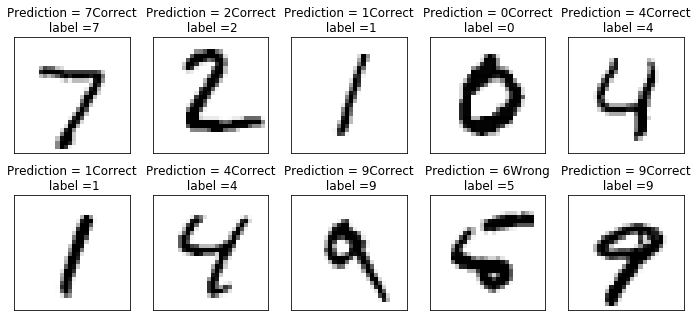

In [24]:
show_image_labels_predictions(test_feature, test_label, prediction,0,10)